In [1]:
# !pip install gym

In [3]:
import sys
sys.path.append('c:\python39\lib\site-packages')

In [19]:
from vizdoom import *
import random
import time
import numpy as np

from gym import Env
from gym.spaces import Discrete, Box
import cv2
import numpy as np

In [9]:
# Discrete(3).sample()

2

In [16]:
Box(low=0, high=10, shape=(320,240), dtype=np.uint8).sample()

array([[ 3,  9,  4, ...,  0,  3,  8],
       [ 3,  0,  0, ...,  4,  3,  7],
       [ 6, 10,  6, ...,  9,  6,  5],
       ...,
       [ 1,  2,  9, ...,  7,  6,  6],
       [ 0,  7,  7, ...,  3,  4,  1],
       [ 1, 10, 10, ...,  5,  9,  6]], dtype=uint8)

In [12]:
actions = np.identity(3, dtype=np.uint8) #The set of actions

In [13]:
actions[Discrete(3).sample()]

array([1, 0, 0], dtype=uint8)

In [220]:
class VizDoomGym(Env):
    # functions
    def __init__(self, render=False):
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github/ViZDoom/scenarios/basic.cfg')
        
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
    
        self.game.init()
                
#         self.observation_space = Box(low=0, high=255, shape=(3,240,320), dtype=np.uint8)
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8)
        self.action_space = Discrete(3)
        
        
    def step(self, action):
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)
        ''' 
        with bugs 'no screen buffer'  
#         state = self.game.get_state()
#         img = state.screen_buffer
#         info = state.game_variables
#         done = self.game.is_episode_finished()
        '''
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            info = self.game.get_state().game_variables
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0
        done = self.game.is_episode_finished()
        
        return state, reward, done, info
    
    def close(self):
        self.game.close()
    
    def render():
        pass
    
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100, 160, 1))
        return state
    
    def reset(self):
        state = self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    

In [222]:
env = VizDoomGym(render = True)

In [223]:
state = env.reset()

In [217]:
# state

In [224]:
state.shape

(100, 160, 1)

In [209]:
# np.moveaxis(state, 0, -1).shape

In [210]:
# env.step(2)

In [146]:
# env.observation_space

In [225]:
env.close()

In [165]:
# !pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 6.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 12.3 MB/s eta 0:00:00
     ------------------------------------- 944.1/944.1 kB 12.0 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\python39\\share\\man\\man1\\ttx.1'
Consider using the `--user` option or check the permissions.



In [166]:
from matplotlib import pyplot as plt

In [211]:
# plt.imshow(state)

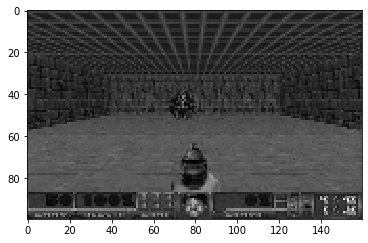

In [226]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))